In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('C:\\Users\\M\\Machine_L\\data\\insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
#1. 전처리
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.bmi = df.bmi.fillna(df.bmi.mean()) #bmi 결측값 채우기

In [ ]:
# sex, smoker 원핫인코딩
# region 라벨인코딩

In [23]:
#2. X, y 나누기
X = df.drop(columns = ['charges'])
y = df.charges

In [24]:
df_ohe = pd.get_dummies(X, dtype = 'int') #object 타입 컬럼 3개 인코딩

In [25]:
#3. train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_ohe, y, test_size = 0.25, random_state = 2024)

In [26]:
# 4. 모델학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
# 5. 예측
pred = lr.predict(X_test)

In [28]:
# 6. 모델평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(pred, y_test)
mae = mean_absolute_error(pred, y_test)
r2s = r2_score(pred, y_test)

print('MSE : ', mse)
print('RMSE : ', np.sqrt(mse))
print('MAE : ', mae)
print('r2 : ', r2s)

MSE :  39945215.22066951
RMSE :  6320.222719229878
MAE :  4246.429516099149
r2 :  0.6310862927668809


In [29]:
#랜덤포레스트

In [30]:
#4. 모델학습
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

In [32]:
#5. 모델평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(pred, y_test)
mae = mean_absolute_error(pred, y_test)
r2s = r2_score(pred, y_test)

print('MSE : ', mse)
print('RMSE : ', np.sqrt(mse))
print('MAE : ', mae)
print('r2 : ', r2s)

MSE :  24964416.0776335
RMSE :  4996.440340645879
MAE :  2694.455999816126
r2 :  0.7936206755142572


In [33]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
149,19,28.40,1,0,1,1,0,0,0,0,1
98,56,19.95,0,0,1,0,1,1,0,0,0
739,29,35.50,2,0,1,0,1,0,0,0,1
707,49,28.69,3,0,1,1,0,0,1,0,0
572,30,43.12,2,1,0,1,0,0,0,1,0


In [37]:
#스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
import sklearn
dir(sklearn.preprocessing)

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'SplineTransformer',
 'StandardScaler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_csr_polynomial_expansion',
 '_data',
 '_discretization',
 '_encoders',
 '_function_transformer',
 '_label',
 '_polynomial',
 'add_dummy_feature',
 'binarize',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'power_transform',
 'quantile_transform',
 'robust_scale',
 'scale']

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor(verbose=-1)
cat = CatBoostRegressor(verbose=0)

In [43]:
for algo in [lr, ridge, lasso, rf, xgb, lgbm, cat]:
  algo.fit(X_train_scaled, y_train)
  preds = algo.predict(X_test_scaled)
  print(algo.__class__.__name__, mean_squared_error(y_test, preds), r2_score(y_test, preds))

LinearRegression 39945215.2206695 0.7226864131292801
Ridge 39952731.911155075 0.7226342296477681
Lasso 39937934.07216141 0.7227369613964045
RandomForestRegressor 25028389.36046472 0.8262442100060087
XGBRegressor 27600974.58300901 0.8083844280107619
LGBMRegressor 26183693.05515282 0.8182236896575997
CatBoostRegressor 24871757.700030837 0.8273316015079064


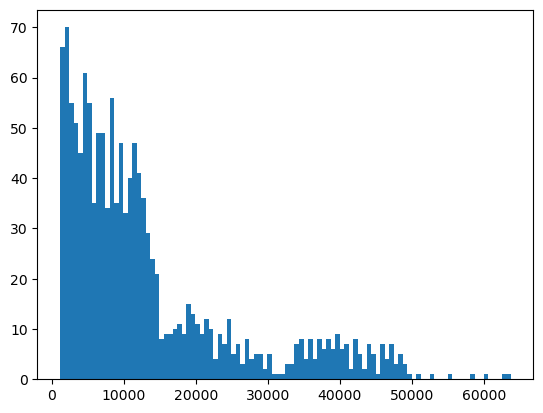

In [44]:
plt.hist(y, bins = 100)
plt.show()

In [45]:
# log 스케일 변환 => 큰값을 많이 줄이고, 작은 값은 상대적으로 적게 줄어든다
# 평균을 중심으로 데이터가 모이는 정규분포와 유사한 형태로 변형

# 인공지능 모델 학습 시, 데이터의 분포가 정규분포인 경우보다 학습이 잘 된다.
y_log = np.log1p(y)

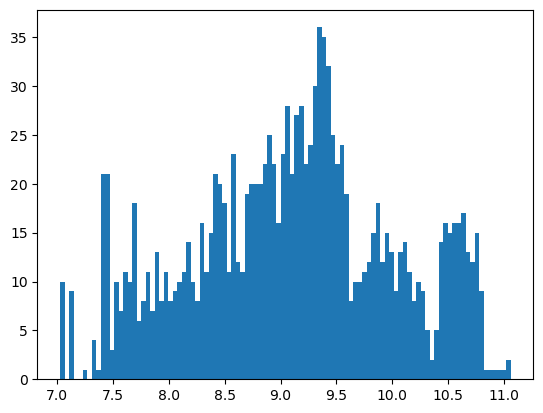

In [46]:
plt.hist(y_log, bins=100)
plt.show()

In [47]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor(verbose=-1)
cat = CatBoostRegressor(verbose=0)

In [48]:
for algo in [lr, ridge, lasso, rf, xgb, lgbm, cat]:
  algo.fit(X_train_scaled, y_train)
  preds = algo.predict(X_test_scaled)
  print(algo.__class__.__name__, mean_squared_error(y_test, preds), r2_score(y_test, preds))

LinearRegression 39945215.2206695 0.7226864131292801
Ridge 39952731.911155075 0.7226342296477681
Lasso 39937934.07216141 0.7227369613964045
RandomForestRegressor 24947161.52295253 0.8268081219251163
XGBRegressor 27600974.58300901 0.8083844280107619
LGBMRegressor 26183693.05515282 0.8182236896575997
CatBoostRegressor 24871757.700030837 0.8273316015079064


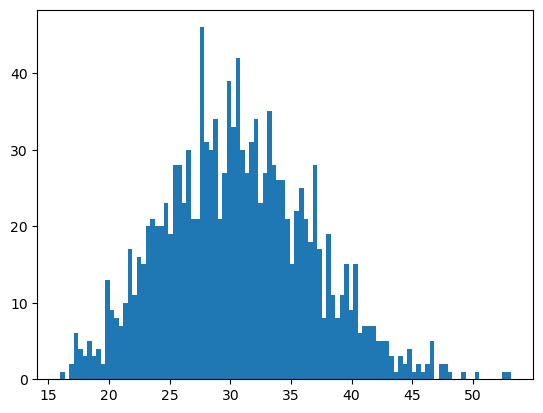

In [52]:
#bmi 컬럼은 이미 정규분포에 가깝게 나타남
plt.hist(df.bmi, bins=100)
plt.show()

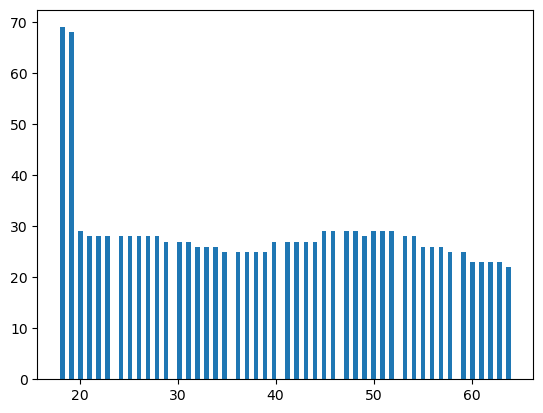

In [53]:
#age 컬럼은 정규분포에 가깝지 않음 => 바꾸려면? 스케일링
plt.hist(df.age, bins=100)
plt.show()

In [58]:
# 스케일링 하기
X_train_sc_log = pd.DataFrame(X_train_scaled).iloc[:,0] = np.log1p(X_train_scaled[:,0])
X_test_sc_log = pd.DataFrame(X_test_scaled).iloc[:,0] = np.log1p(X_test_scaled[:,0])

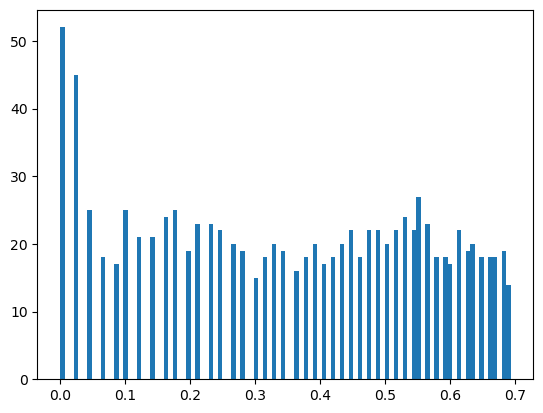

In [63]:
plt.hist(np.log1p(X_train_scaled[:, 0]), bins=100)
plt.show()

In [64]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor(verbose=-1)
cat = CatBoostRegressor(verbose=0)

In [66]:
for algo in [lr, ridge, lasso, rf, xgb, lgbm, cat]:
  algo.fit(X_train_scaled, y_train)
  preds = algo.predict(X_test_scaled)
  print(algo.__class__.__name__, mean_squared_error(y_test, preds), r2_score(y_test, preds))

LinearRegression 39945215.2206695 0.7226864131292801
Ridge 39952731.911155075 0.7226342296477681
Lasso 39937934.07216141 0.7227369613964045
RandomForestRegressor 25182718.879184306 0.8251728007731447
XGBRegressor 27600974.58300901 0.8083844280107619
LGBMRegressor 26183693.05515282 0.8182236896575997
CatBoostRegressor 24871757.700030837 0.8273316015079064
